In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import erf
from scipy.stats import vonmises,norm
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import iv
from scipy.integrate import dblquad,quad
import matplotlib as mpl

import bqplot as bq
import bqplot.interacts as bqi
import ipywidgets as ipw
import ipyvolume as ipv

#Set font
font = {'family':'serif','size':10}
mpl.rc('font',**font)

In [7]:
from numpy import *

# 2D

In [2]:
def plot_frond(L=1,fr=2,fs=0.5,theta_f=0,alpha=0.7,color='g',fill_bool=True):
    
    #figure(1,figsize=[6,6])
    #gca(projection='polar')
    theta_a = arctan(2*fr*fs/(1+fs))
    theta_prime = linspace(theta_a,pi-theta_a,1e3)
    S = sign(pi/2 - theta_prime)
    r_max = L/(sin(theta_prime)+2*S*fr/(1+fs)*cos(theta_prime)) 
    theta = theta_prime + theta_f - pi/2
    
    if(fill_bool==True):
        fill(r_[0,theta,0],r_[0,r_max,0],color,alpha=alpha)
    else:
        plot(r_[0,theta,0],r_[0,r_max,0],color,alpha=alpha)
    xlim(0,2*pi)
    ylim(0,5)

In [3]:
def plot_rope(N=3,vw=0,theta_w_deg=0,L_mean=3,L_std=1,fr=2,fs=0.5,stiff=1):
    
    # Convert frond angle from degrees to radians
    theta_w = theta_w_deg*pi/180
    
    # Distribution of frond lengths
    L_dist = random.normal(L_mean,L_std,N)
    
    # Distribution of frond angles
    if vw > 0:
        theta_f_dist = random.vonmises(theta_w,vw/stiff,N)
    else:
        theta_f_dist = pi*(random.rand(N)*2-1)
    
    # Plot kelp fronds
    for ii in range(N):
        plot_frond(L_dist[ii],fr,fs,theta_f_dist[ii])

/home/oliver/local/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


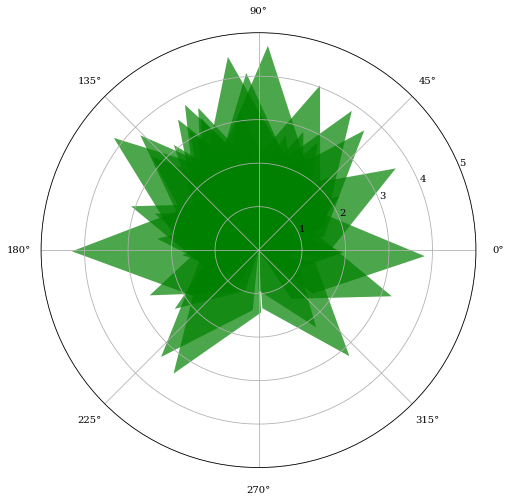

In [4]:
figure(figsize=[8,8])
gca(projection='polar')
plot_rope(50,L_mean=3,L_std=1,vw=1,theta_w_deg=120)
savefig('../reports/figures/kelp_sample_1.png')

/home/oliver/local/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


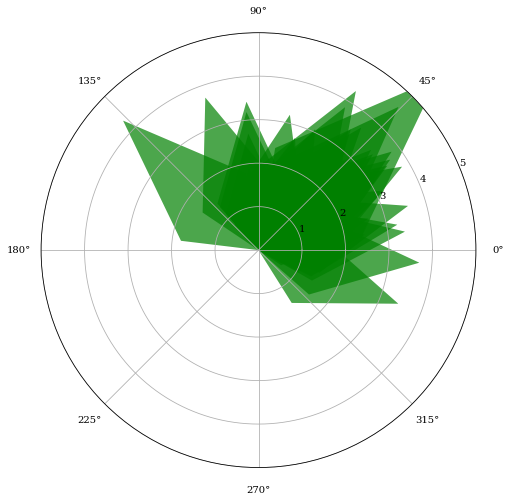

In [5]:
figure(figsize=[8,8])
gca(projection='polar')
plot_rope(50,L_mean=3,L_std=1,vw=4,theta_w_deg=45)
savefig('../reports/figures/kelp_sample_2.png')

In [6]:
import seaborn as sns
sns.set_style('whitegrid')
font = {'family':'serif','size':10}
mpl.rc('font',**font)

In [7]:
def qf(theta_f,L,alpha=0.7,color='g',fill_bool=True):
    plot_frond(L,2,0.5,theta_f,alpha=alpha,color=color,fill_bool=fill_bool)
    plot(theta_f,L,'o',mfc=color,mec='k',markersize=5)

In [246]:
# L_star
def Ls(theta_point,r_point,theta_f):
    theta_prime = theta_point - theta_f + pi/2
    S = sign(pi/2-theta_prime)
    return r_point*(sin(theta_prime)+2*S*fr/(1+fs)*cos(theta_prime))

In [9]:
sns.reset_orig()
#Set font
font = {'family':'serif','size':10}
mpl.rc('font',**font)

/home/oliver/local/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


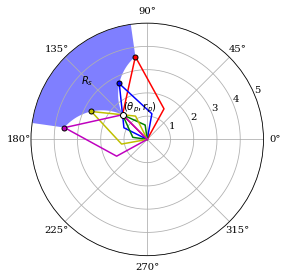

In [10]:
# Figure
#sns.reset_orig()
figure(facecolor='white',figsize=(4,4))
gca(projection='polar')

# Kelp
#qf(pi/4,2)
#qf(pi/3,3)

# Point
theta_point=3*pi/4
r_point=1.5
fr=2
fs=0.5
alpha = arctan((1+fs)/(2*fr*fs))

# Shading Area
th=linspace(theta_point-alpha,theta_point+alpha,101)
th_prime=theta_point-th+pi/2
S = sign(pi/2-th_prime)
fill_between(th,Ls(theta_point,r_point,th),5,facecolor='b',alpha=0.5)
annotate(
    r'$R_s$',
    xy=(theta_point,4),
    va='top',
    ha='left')

# Test
color_list=['r','b','g','y','m']
th1 = linspace(theta_point-alpha,theta_point+alpha,5)
for ii,tt in enumerate(th1):
    qf(tt,Ls(theta_point,r_point,tt),alpha=1,color=color_list[ii],fill_bool=False)

# Point
plot(theta_point,r_point,'ow',mec='k')
annotate(
    r'$(\theta_p,r_p)$',
    xy=(theta_point,r_point),
    verticalalignment='bottom',
    horizontalalignment='left')

tight_layout()
savefig('../reports/figures/shade_area.pdf')

In [11]:
# Plot probability of shading from one frond
def prob_shade(vw=0,theta_w_deg=0,L_mean=3,L_std=1,fr=2,fs=0.5,stiff=1):
    # Convert frond angle from degrees to radians
    theta_w = theta_w_deg*pi/180
    
    # Create figure
    figure(2,figsize=[12,6])
    gca(projection='polar')
    
    # Alpha angle
    alpha = arctan((1+fs)/(2*fr*fs))
    
    # 2D array of theta and r
    TH = linspace(-pi,pi,101)
    RR = linspace(0,5,101)
    theta,rr = meshgrid(TH,RR)
    
    # P(r_max >= r)
    #P_r = (1-erf((rr-L_mean)/(sqrt(2)*L_std)))/(2*(sin(theta)+2*S*fr/(1+fs)*cos(theta)))
    def g(theta_prime):
        S = sign(pi/2-theta_prime)
        return (sin(theta_prime)+2*S*fr/(1+fs)*cos(theta_prime))
    
    # P(theta_a <= theta <= theta_b)
    if vw > 0:
        P_theta = vonmises.cdf(theta+alpha,vw/stiff,theta_w) - vonmises.cdf(theta-alpha,vw/stiff,theta_w)
        #P_r = g(vonmises.pdf(theta,theta_w,vw/stiff))*(1-norm.cdf(rr,L_mean,L_std))
    else:
        P_theta = ones_like(theta)/pi
        #P_r = g(ones_like(theta)/2*pi)*(1-norm.cdf(rr,L_mean,L_std))
        
    # Contour plot
    contourf(theta,rr,P_theta,levels=linspace(0,1,101),cmap='YlGn')
    #colorbar()
    

In [12]:
# Probability distribution of L and theta_f
def prob_dist(L_mean,L_std,vw,theta_w):
    LL = linspace(0,5,101)
    theta_f = linspace(-pi,pi,101)
    
    LL,theta_f = meshgrid(LL,theta_f)
    P_L = norm.pdf(LL,L_mean,L_std)
    if vw > 0:
        P_th = vonmises.pdf(theta_f,vw,theta_w)
    else:
        P_th = ones_like(theta_f)/(2*pi)
        
    gca().set_xticks(linspace(-pi,pi,5))
    gca().set_xticklabels([r'$-\pi$',r'$-\frac{\pi}{2}$',r'$0$',r'$\frac{\pi}{2}$',r'$-\pi$'])
    
    contourf(theta_f,LL,P_L*P_th,cmap='YlGn')
    xlabel(r'$\theta_f$')
    ylabel(r'$l$')
    #colorbar()
    tight_layout()

In [13]:
sns.set_style('whitegrid')
#Set font
font = {'family':'serif','size':10}
mpl.rc('font',**font)

In [2]:
def P_shade(rr,theta,vw=0,theta_w_deg=0,L_mean=3,L_std=1,fs=0.5,fr=2,stiff=1):
    
    # Convert theta_w to radians
    theta_w = theta_w_deg*pi/180
    
    # Frond half-span angle
    alpha = arctan((1+fs)/(2*fs*fr))
    
    # Try single integral
    def single_pdf(theta_f):
        
        theta_prime = theta - theta_f + np.pi/2
        S = sign(np.pi/2-theta_prime)
        
        # Minimum L for shading as a function of central frond angle
        L_star = rr*(sin(theta_prime)+2*S*fr/(1+fs)*cos(theta_prime))
    
        # Integrated normalized L distribution
        C_L = erf((L_star-L_mean)/(sqrt(2)*L_std)) / (1-erf(-L_mean/(sqrt(2)*L_std)))
        
        # Theta_f distribution
        if vw > 0:
            P_theta_f = vonmises.pdf(theta_f,vw/stiff,theta_w)
        else:
            P_theta_f = ones_like(theta_f)/(2*pi)
        
        return (1-C_L)*P_theta_f/2
    SI = quad(single_pdf,theta-alpha,theta+alpha)
    
    return SI[0]

In [15]:
# Lone shade probability plot
def shade_plot(vw=0,theta_w_deg=0,L_mean=3,L_std=1,fs=0.5,fr=2,stiff=1):
    th = linspace(-pi,pi,48)
    rr = linspace(0,5,31)
    rr,th = meshgrid(rr,th)

    PP = zeros_like(rr)

    for ii in range(PP.shape[0]):
        for jj in range(PP.shape[1]):
            PP[ii,jj] = P_shade(rr[ii,jj],th[ii,jj],vw=vw,theta_w_deg=theta_w_deg,
                L_mean=L_mean,L_std=L_std,fs=fs,fr=fr,stiff=stiff)

    fig = figure(figsize=[4.5,4])
    gca(projection='polar')

    # Shade probability plot
    contourf(th,rr,PP,cmap='YlGn',levels=linspace(0,0.5,101))
    ylim(0,5)
    #colorbar()
    tight_layout()
    
    return (th,rr,PP)


In [16]:
def visualize(vw=0,theta_w_deg=0,L_mean=3,L_std=1,fs=0.5,fr=2,stiff=1):
    th = linspace(-pi,pi,22)
    rr = linspace(0,5,22)
    rr,th = meshgrid(rr,th)

    PP = zeros_like(rr)

    for ii in range(PP.shape[0]):
        for jj in range(PP.shape[1]):
            PP[ii,jj] = P_shade(rr[ii,jj],th[ii,jj],vw=vw,theta_w_deg=theta_w_deg,
                L_mean=L_mean,L_std=L_std,fs=fs,fr=fr,stiff=stiff)

    fig = gcf()
    fig.set_size_inches(16,8)
    
    # Shade probability plot
    fig.add_axes([0,0,0.45,1],projection='polar')
    contourf(th,rr,PP,cmap='YlGn',levels=linspace(0,1,101))
    
    # Kelp plot
    fig.add_axes([0.55,0,0.45,1],projection='polar')
    plot_rope(50,vw=vw,theta_w_deg=theta_w_deg,L_mean=L_mean,L_std=L_std,fs=fs,fr=fr,stiff=stiff)
   
    # Draw current velocity
    theta_w = theta_w_deg*pi/180
    water_ax = fig.add_axes([0.35,0,0.3,0.3],projection='polar')
    water_ax.get_xaxis().set_ticklabels([])
    water_ax.get_yaxis().set_ticklabels([])
    water_ax.annotate('',xy=(theta_w,vw),xytext=(0,0),
        arrowprops=dict(facecolor='black', shrink=0.05),
        horizontalalignment='left',
        verticalalignment='bottom',)
    water_ax.set_ylim(0,3)
    
    #return PP

/home/oliver/local/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


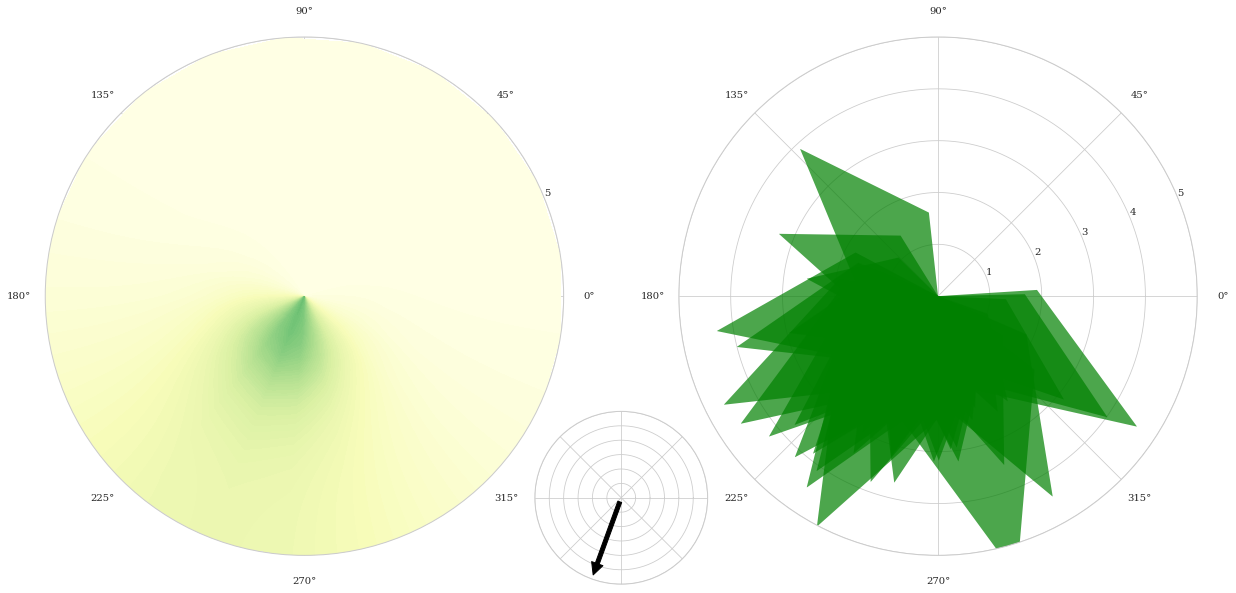

In [17]:
#11x11
visualize(3,250)

In [18]:
# Make animation
#for tt in range(50,201):
#    print("t = {}".format(tt))
#    theta_w_deg = 180*(tt/100-1)
#    vw = 3*abs(sin(tt*pi/50))
#    visualize(vw=vw,theta_w_deg=theta_w_deg,L_mean=3,L_std=0.5)
#    savefig('../results/shading_model/movie/img/{:03d}.png'.format(tt))

# 3D

In [3]:
# Spatial resolution
ds = 1e-1
# Angular resolution
#da = pi/6

# Define domain
xmin, xmax, dx = -1, 1, ds
ymin, ymax, dy = -1, 1, ds
zmin, zmax, dz =  0, 1, ds
#thmin, thmax, nth, = 0, 2*np.pi, da
#phmin, phmax, nph = 0, np.pi, da

nx = int((xmax - xmin) / dx)
ny = int((ymax - ymin) / dy)
nz = int((zmax - zmin) / dz)

# Allocate arrays
x = np.linspace(xmin, xmax, nx, endpoint=False)
y = np.linspace(ymin, ymax, ny, endpoint=False)
z = np.linspace(zmin, zmax, nz, endpoint=False)
#th = np.linspace(thmin, thmax, nth)
#ph = np.linspace(phmin, phmax, nph)

# Convert x and y to polar coordinates
xg, yg = np.meshgrid(x, y, indexing='ij')
rr = np.sqrt(xg**2 + yg**2)
th = np.arctan2(xg, yg)

# Create grid
#xg, yg, zg = np.meshgrid(x, y, z, indexing='ij')

In [5]:
# Define variables over depth

z_quants = ['vw', 'theta_w_deg', 'L_mean', 'L_std']

z_scale = bq.LinearScale(min=zmin, max=zmax)
z_ax = bq.Axis(scale=z_scale, label='Depth (z)', grid_lines='none')

mins = {
    'vw': 0,
    'theta_w_deg': 0,
    'L_mean': 0,
    'L_std': 0
}

maxs = {
    'vw': 1,
    'theta_w_deg': 360,
    'L_mean': 1,
    'L_std': 1
}

colors = {
    'vw': 'red',
    'theta_w_deg': 'green',
    'L_mean': 'blue',
    'L_std': 'yellow'
}

labels = {
    'vw': 'Water current velocity',
    'theta_w_deg': 'Water current angle',
    'L_mean': 'Frond length mean',
    'L_std': 'Frond length std. dev.'
}


values = {}
for quant in z_quants:
    values[quant] = np.zeros_like(z)


ys = {}
lines = {}
handdraws = {}
yax = {}
figs = {}

out_area = ipw.Output()

for quant in z_quants:
    ys[quant] = bq.LinearScale(min=mins[quant], max=maxs[quant])
    lines[quant] = bq.Lines(x=z, y=values[quant], scales={'x': z_scale, 'y': ys[quant]}, colors=[colors[quant]])
    handdraws[quant] = bqi.HandDraw(lines=lines[quant])
    yax[quant] = bq.Axis(scale=ys[quant], label=labels[quant], orientation='vertical', grid_lines='none')
    figs[quant] = bq.Figure(marks=[lines[quant]], axes=[z_ax, yax[quant]], interaction=handdraws[quant])
    
    # Update values on handdraw
    # Define the function like this with default argument so that `quant` takes its
    # value at definition time, not evaluation time
    def update_vals(change, quant=quant):
        with out_area:
            print()
            print(quant)
            values[quant] = change['new']
            print('Updated!')
    lines[quant].observe(update_vals, names='y')

ipw.VBox([
    ipw.HBox([
        figs['vw'],
        figs['theta_w_deg'],
    ]),
    ipw.HBox([
        figs['L_mean'],
        figs['L_std']
    ])
])

A Jupyter Widget

In [10]:
P3D = np.zeros([nx, ny, nz])

for ii in range(nx):
    print("{}/{}".format(ii+1, nx))
    for jj in range(ny):
        for kk in range(nz):
            P3D[ii, jj, kk] = P_shade(
                rr=rr[ii,jj], 
                theta=th[ii,jj], 
                vw=values['vw'][kk],
                theta_w_deg=values['theta_w_deg'][kk],
                L_mean=values['L_mean'][kk],
                L_std=values['L_std'][kk]
            )


1/20
2/20
3/20
4/20
5/20
6/20
7/20
8/20
9/20
10/20
11/20
12/20
13/20
14/20
15/20
16/20
17/20
18/20
19/20
20/20


In [11]:
ipv.quickvolshow(P3D)

A Jupyter Widget

In [196]:
P_shade?

# Other stuff

In [19]:
# Calculate theta in [-pi,pi) from x,y
def theta_xy(x,y):
    # Calculate value in [0,2*pi]
    try:
        pos_val = arctan(y/x) + pi*(x<0)
    except(ZeroDivisionError):
        pos_val = sign(y)*pi/2
    
    # Numpy returns nan on divide by zero
    # Change nans to 0.
    try:
        pos_val[isnan(pos_val)] = 0
    except(TypeError):
        if isnan(pos_val):
            pos_val = 0
    
    # Shift range
    new_val = pos_val - (pos_val>=pi)*2*pi
    
    return new_val

In [20]:
def to_2d_array(X):
    if ndim(X) == 0:
        return array([[X]])
    elif ndim(X) == 1:
        return array([X])
    else:
        return array(X)

In [21]:
# Shift coordinates along sun ray a depth dz
def polar_shift(theta,rr,dz,phi_s=0,theta_s=0):
    # Convert theta, rr to 2d arrays
    theta,rr = map(to_2d_array,[theta,rr])
    
    # Old cartesian coordinates
    xx = rr*cos(theta)
    yy = rr*sin(theta)
    
    # Cartesian shifts
    dx = dz*tan(phi_s)*cos(theta_s)
    dy = dz*tan(phi_s)*sin(theta_s)
    
    # New cartesian coordinates
    x_hat = xx + dx 
    y_hat = yy + dy 
    
    # New polar coordinates
    theta_hat = array(theta_xy(x_hat,y_hat))
    r_hat = array(sqrt(x_hat**2 + y_hat**2))
    
    # Preserve angle if zero radius or theta = pi
    if dz == 0:
        theta_hat[rr==0] = theta[rr==0]
        theta_hat[theta==pi] = theta[theta==pi]
    
    return array([theta_hat,r_hat])

In [22]:
def plot_frond_shift(L=1,fr=2,fs=0.5,theta_f=0,alpha=0.7,color='g',fill_bool=True,theta_s=0,phi_s=0,dz=0):
    figure(1,figsize=[6,6])
    gca(projection='polar')
    theta_a = arctan(2*fr*fs/(1+fs))
    theta_prime = linspace(theta_a,pi-theta_a,1e3)
    S = sign(pi/2 - theta_prime)
    r_max = L/(sin(theta_prime)+2*S*fr/(1+fs)*cos(theta_prime)) 
    theta = theta_prime + theta_f - pi/2
    
    if(fill_bool==True):
        print('a')
        fill(*polar_shift(r_[0,theta,0],r_[0,r_max,0],theta_s=theta_s,phi_s=phi_s,dz=dz),color,alpha=alpha)
        print('b')
    else:
        plot(*polar_shift(r_[0,theta,0],r_[0,r_max,0],theta_s=theta_s,phi_s=phi_s,dz=dz),color,alpha=alpha)
    print('c')
    xlim(0,2*pi)
    print('d')
    ylim(0,5)
    print('e')

In [24]:
#plot_frond_shift(L=3,theta_f=pi/3,theta_s=pi/2,phi_s=pi/6,dz=5)

In [25]:
# Lone shade probability plot
def shade_plot_3d(vw=0,theta_w_deg=0,L_mean=3,L_std=1,fs=0.5,fr=2,stiff=1,phi_s_deg=30,theta_s_deg=45,dz=0):
    th = linspace(-pi,pi,48)
    rr = linspace(0,5,31)
    rr,th = meshgrid(rr,th)
    
    # Convert phi_s,theta_s to radians
    phi_s,theta_s = map(lambda x: x*pi/180,[phi_s_deg,theta_s_deg])
    
    # Shift point towards the sun
    theta_p_hat,r_p_hat = polar_shift(rr=rr,theta=th,phi_s=phi_s,theta_s=theta_s,dz=dz)

    # Allocate probability array
    PP = zeros_like(rr)

    # Calculate probability of shading for each point - loop radially & angularly
    for ii in range(PP.shape[0]):
        for jj in range(PP.shape[1]):
            PP[ii,jj] = P_shade(r_p_hat[ii,jj],theta_p_hat[ii,jj],vw=vw,theta_w_deg=theta_w_deg,
                L_mean=L_mean,L_std=L_std,fs=fs,fr=fr,stiff=stiff)

    fig = figure(figsize=[4.5,4])
    gca(projection='polar')

    # Shade probability plot
    contourf(th,rr,PP,cmap='YlGn',levels=linspace(0,0.5,101))
    ylim(0,5)
    #colorbar()
    tight_layout()
    
    return (th,rr,PP)


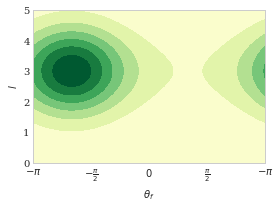

In [26]:
figure(figsize=[4,3],facecolor='white')
prob_dist(3,1,1,-2*pi/3)
RR = Ls(theta_point,r_point,th)
#fill_between(th,RR,5,facecolor='k',linewidth=0,alpha=0.6)
#plot(r_[th[0],th,th[-1]],r_[5,RR,5],'k',linewidth=2)
tight_layout()
savefig('../reports/figures/prob_2d.pdf')

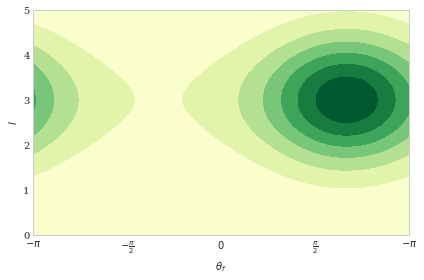

In [27]:
prob_dist(3,1,1,2*pi/3)
#savefig('../reports/figures/prob_2d.eps')

In [28]:
sns.reset_orig()
#Set font
font = {'family':'serif','size':10}
mpl.rc('font',**font)

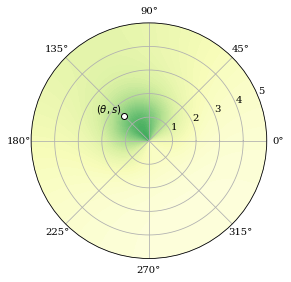

In [29]:
figure(figsize=[4,4],facecolor='white')
shade_plot(1,120,3,1,0.5,2)
plot(theta_point,r_point,'o',mfc='w',mec='k')
annotate(
    r'$(\theta,s)$',
    xy=(theta_point,r_point),
    xytext=(-3,0),
    textcoords='offset points',
    verticalalignment='bottom',
    horizontalalignment='right')
savefig('../reports/figures/prob_shade.pdf')

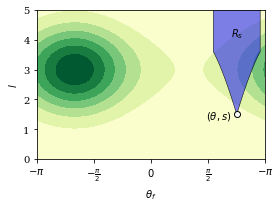

In [30]:
figure(figsize=[4,3],facecolor='white')
prob_dist(3,1,1,-2*pi/3)
RR = Ls(theta_point,r_point,th)
fill_between(th,RR,5,facecolor='b',linewidth=0,alpha=0.5)
x_points = r_[th[0],th,th[-1]]
y_points = r_[5,RR,5]
plot(x_points,y_points,'k',linewidth=0.5)
# Point
plot(theta_point,r_point,'o',mfc='w',mec='k')
annotate(
    r'$(\theta,s)$',
    xy=(theta_point,r_point),
    xytext=(-5,5),
    textcoords='offset points',
    verticalalignment='top',
    horizontalalignment='right')
annotate(
    r'$R_s$',
    xy=(theta_point,4),
    va='bottom',
    ha='center')
tight_layout()
savefig('../reports/figures/cart_shade.pdf')

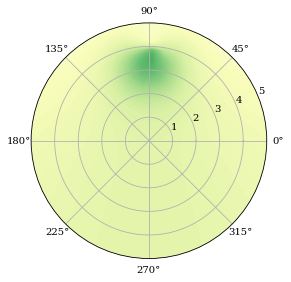

In [31]:
kw = dict(vw=1,
          theta_w_deg=-90,
          L_mean=3,
          L_std=1)
A = shade_plot_3d(**kw,
                  phi_s_deg=45,
                  theta_s_deg=-90,
                  dz=4)

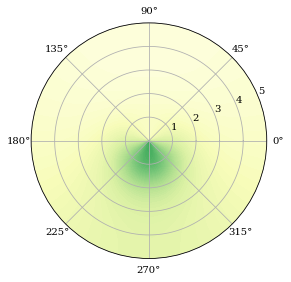

In [32]:
A=shade_plot(vw=1,theta_w_deg=-90)

In [33]:
# Redistribution
def f(x,y):
    x0=1
    y0=2
    r = sqrt((x-x0)**2+(y-y0)**2)
    return cos(x+y)*exp(-r**2)+2 - x**2/100 -y**3/100

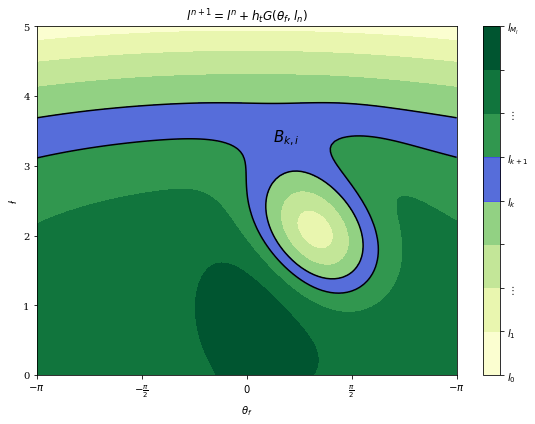

In [34]:
t = linspace(0,5,101)
t1 = linspace(-pi,pi,101)
y,x = meshgrid(t,t1)
figure(figsize=[8,6])
cont = contourf(x,y,f(x,y),cmap='YlGn')
title(r'$l^{n+1} = l^n + h_t G(\theta_f,l_n)$')
xlabel(r'$\theta_f$')
ylabel(r'$\l$')
gca().set_xticks(linspace(-pi,pi,5))
gca().set_xticklabels([r'$-\pi$',r'$-\frac{\pi}{2}$',r'$0$',r'$\frac{\pi}{2}$',r'$-\pi$'])

cb = colorbar()
#cb.set_ticks([0,1/9,7/18,4/9,5/9,15/18,1])
cb.ax.set_yticklabels(['$l_0$','$l_1$',r'$\vdots$','',r'$l_k$',r'$l_{k+1}$',r'$\vdots$','',r'$l_{M_l}$']);
cb.ax.fill_between([0,1],[4/8,4/8],[5/8,5/8],color='w',alpha=0.5)
cb.ax.fill_between([0,1],[4/8,4/8],[5/8,5/8],color='b',alpha=0.5)

contourf(x,y,f(x,y),colors='w',alpha=0.5,levels=cont.levels[4:6])
contourf(x,y,f(x,y),colors='b',alpha=0.5,levels=cont.levels[4:6])
contour(x,y,f(x,y),levels=cont.levels[4:6],colors='k')

annotate(
    r'$B_{k,i}$',
    xy=(0.6,3.4),
    fontsize=15,
    va='center',
    ha='center')

tight_layout()
savefig('../reports/figures/redist1.pdf')

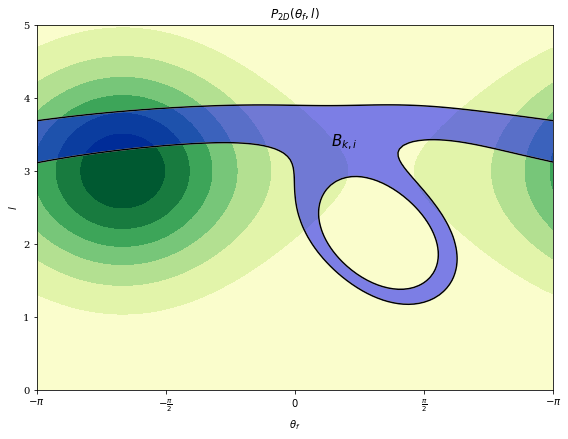

In [35]:
figure(figsize=[8,6])
prob_dist(3,1,1,-2*pi/3)
contourf(x,y,f(x,y),colors='b',alpha=0.5,levels=cont.levels[4:6])
contour(x,y,f(x,y),levels=cont.levels[4:6],colors='w')
contour(x,y,f(x,y),levels=cont.levels[4:6],colors='k')
annotate(
    r'$B_{k,i}$',
    xy=(0.6,3.4),
    fontsize=15,
    va='center',
    ha='center')
title(r"$P_{2D}(\theta_f,l)$")
xlim(-pi,pi)
ylim(0,5)
savefig('../reports/figures/redist2.pdf')